In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv('Sales4.1.csv')

In [3]:
df.head()

,DATE,EDIBLE,SACHET,PDV,OTHERS,SEASONING
0,2018-01-28,32549.30,3859.56,49.00,4362.0,165.17
1,2018-02-28,23448.62,3288.78,49.00,3227.7,135.17
2,2018-03-28,25924.96,2919.80,23.05,3478.1,141.81
3,2018-04-28,30233.16,3963.16,160.00,3213.1,121.35
4,2018-05-28,24212.81,3425.22,137.50,3009.5,124.27


In [4]:
df['EDIBLE']

0     32549.30
1     23448.62
2     25924.96
3     30233.16
4     24212.81
        ...   
67    23608.30
68    17886.65
69    24990.25
70    28651.50
71    24052.05
Name: EDIBLE, Length: 72, dtype: float64

In [5]:
df['DATE'].min(), df['DATE'].max()

('2018-01-28', '2023-12-28')

In [6]:
df.columns

Index(['DATE', 'EDIBLE', 'SACHET', 'PDV', 'OTHERS', 'SEASONING'], dtype='object')

In [7]:
cols_to_drop = ['SACHET', 'PDV', 'OTHERS', 'SEASONING']

In [8]:
df.drop(cols_to_drop, axis=1, inplace=True)

In [9]:
df = df.sort_values('DATE')

In [10]:
df.isnull().sum()

DATE      0
EDIBLE    0
dtype: int64

In [11]:
df.head()

,DATE,EDIBLE
0,2018-01-28,32549.30
1,2018-02-28,23448.62
2,2018-03-28,25924.96
3,2018-04-28,30233.16
4,2018-05-28,24212.81


In [12]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    72 non-null     datetime64[ns]
 1   EDIBLE  72 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [14]:
df = df.set_index('DATE')
df.index

DatetimeIndex(['2018-01-28', '2018-02-28', '2018-03-28', '2018-04-28',
               '2018-05-28', '2018-06-28', '2018-07-28', '2018-08-28',
               '2018-09-28', '2018-10-28', '2018-11-28', '2018-12-28',
               '2019-01-28', '2019-02-28', '2019-03-28', '2019-04-28',
               '2019-05-28', '2019-06-28', '2019-07-28', '2019-08-28',
               '2019-09-28', '2019-10-28', '2019-11-28', '2019-12-28',
               '2020-01-28', '2020-02-28', '2020-03-28', '2020-04-28',
               '2020-05-28', '2020-06-28', '2020-07-28', '2020-08-28',
               '2020-09-28', '2020-10-28', '2020-11-28', '2020-12-28',
               '2021-01-28', '2021-02-28', '2021-03-28', '2021-04-28',
               '2021-05-28', '2021-06-28', '2021-07-28', '2021-08-28',
               '2021-09-28', '2021-10-28', '2021-11-28', '2021-12-28',
               '2022-01-28', '2022-02-28', '2022-03-28', '2022-04-28',
               '2022-05-28', '2022-06-28', '2022-07-28', '2022-08-28',
      

In [15]:
edible = df['EDIBLE'].resample('MS').mean()

In [16]:
edible['2023':]

DATE
2023-01-01    19311.60
2023-02-01    19975.80
2023-03-01    22616.70
2023-04-01    25917.45
2023-05-01    25121.55
2023-06-01    26046.16
2023-07-01    30635.35
2023-08-01    23608.30
2023-09-01    17886.65
2023-10-01    24990.25
2023-11-01    28651.50
2023-12-01    24052.05
Freq: MS, Name: EDIBLE, dtype: float64

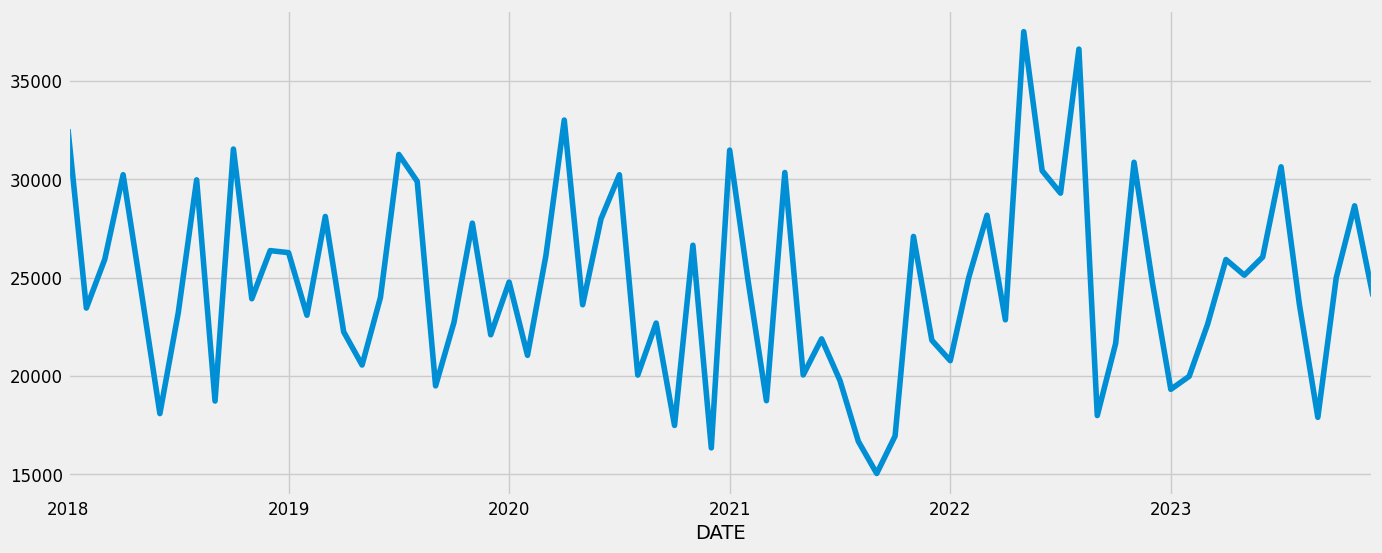

In [17]:
edible.plot(figsize=(15, 6))
plt.show()

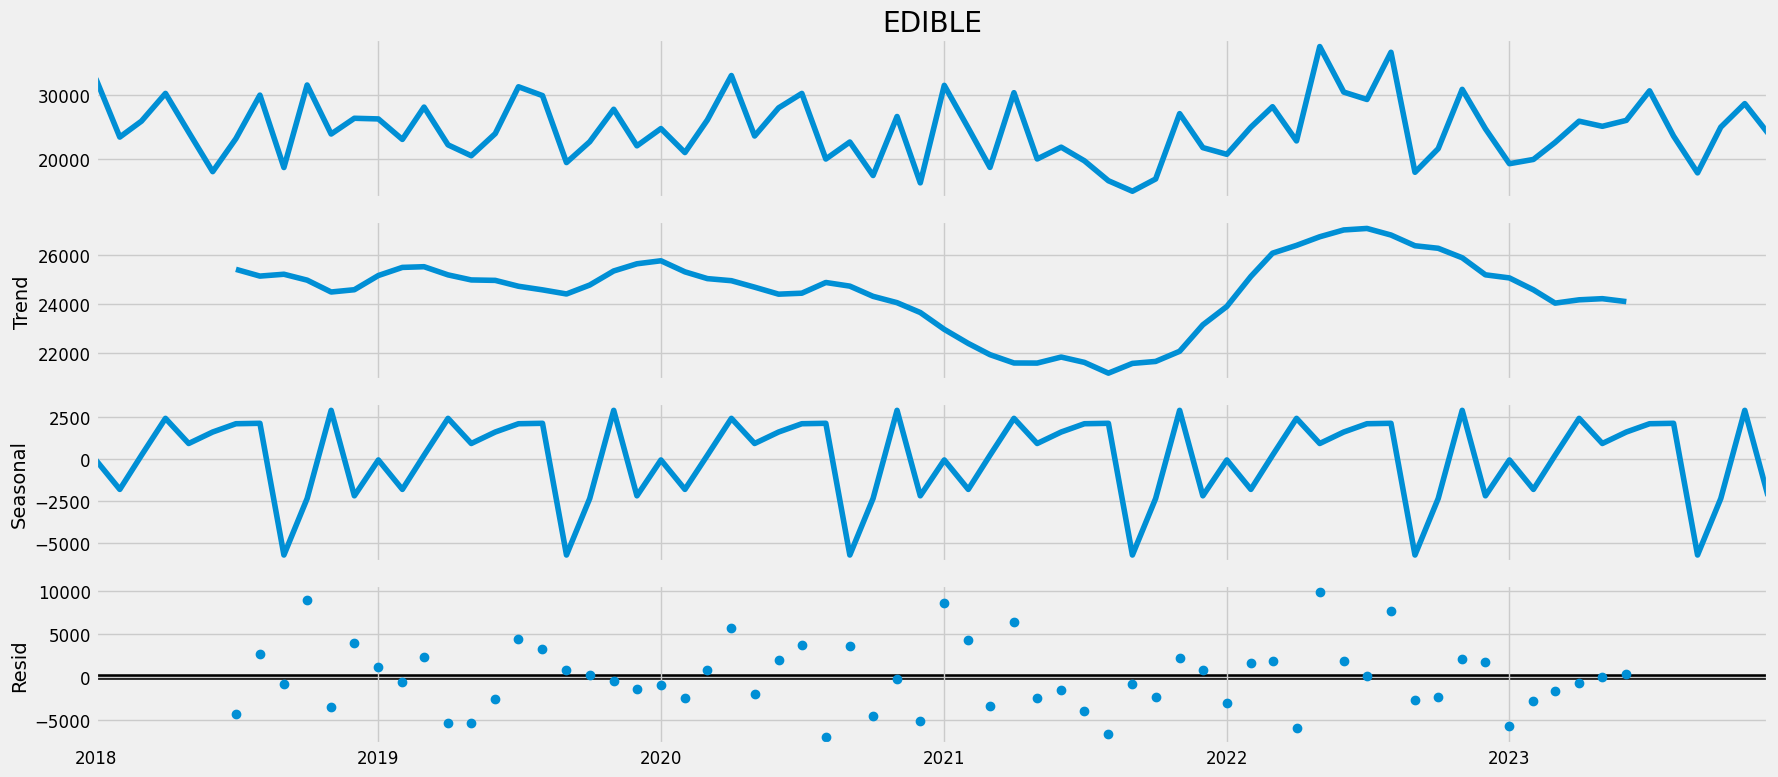

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(edible, model='additive')
fig = decomposition.plot()
plt.show()

In [19]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [20]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(edible,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1641.5607287874066
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1328.988745499178
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1208.0820018730287
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:959.9615412904062
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1228.3330667917946
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1206.8028708179365
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:977.7547199215373
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:956.9037600792268
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1575.7650834551341
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1296.163895138098
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1189.640670321598
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:939.2628476951201
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1334.9009239870234
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1292.381007237177
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:980.448283390065
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:939.9939731226565
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1434.9179792365035
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1187.6135000470633
ARI

In [21]:
#ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:917.1476855215683

In [22]:
#FITTING THE ARIMA MODEL

In [23]:
mod = sm.tsa.statespace.SARIMAX(edible,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7512      0.185     -4.071      0.000      -1.113      -0.390
ma.S.L12      -0.6351      0.169     -3.769      0.000      -0.965      -0.305
sigma2      5.233e+07   5.16e-10   1.01e+17      0.000    5.23e+07    5.23e+07


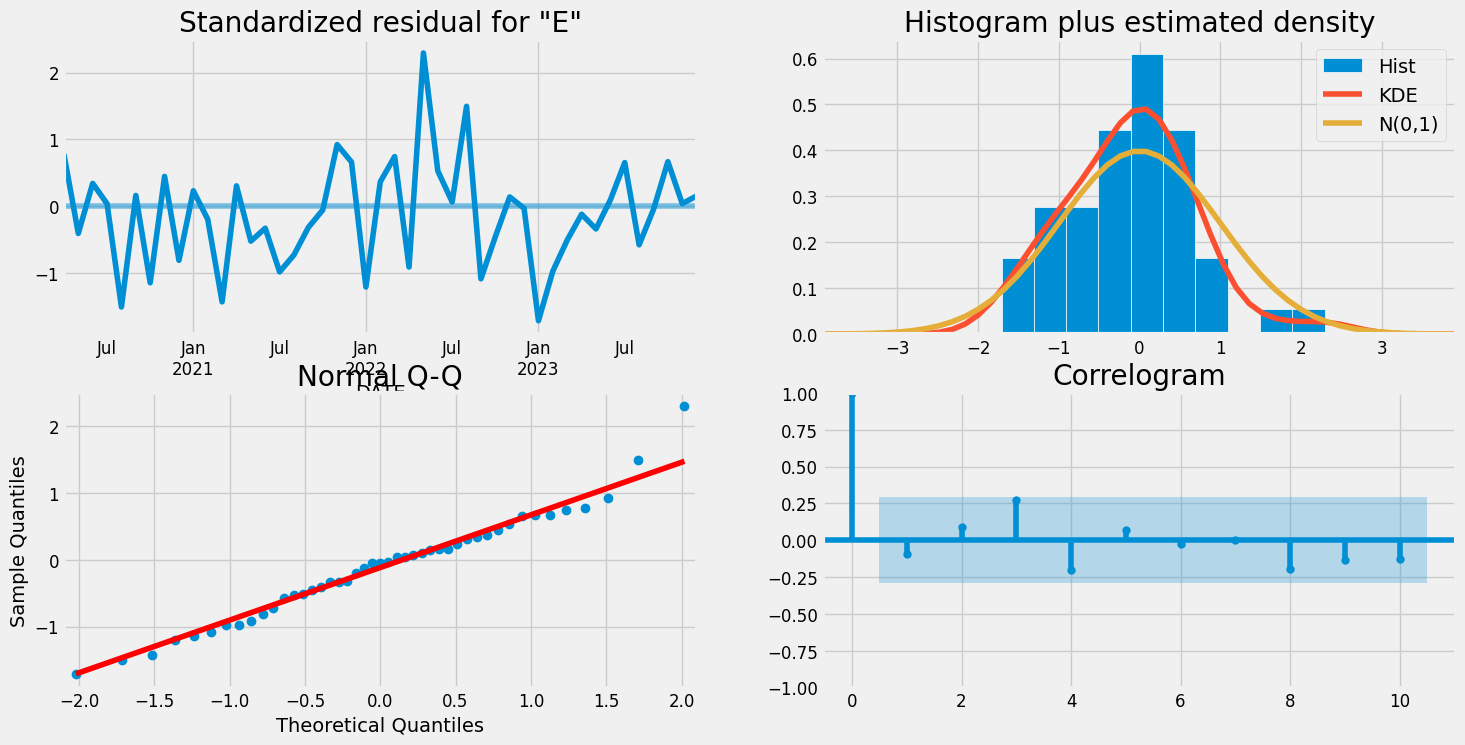

In [24]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

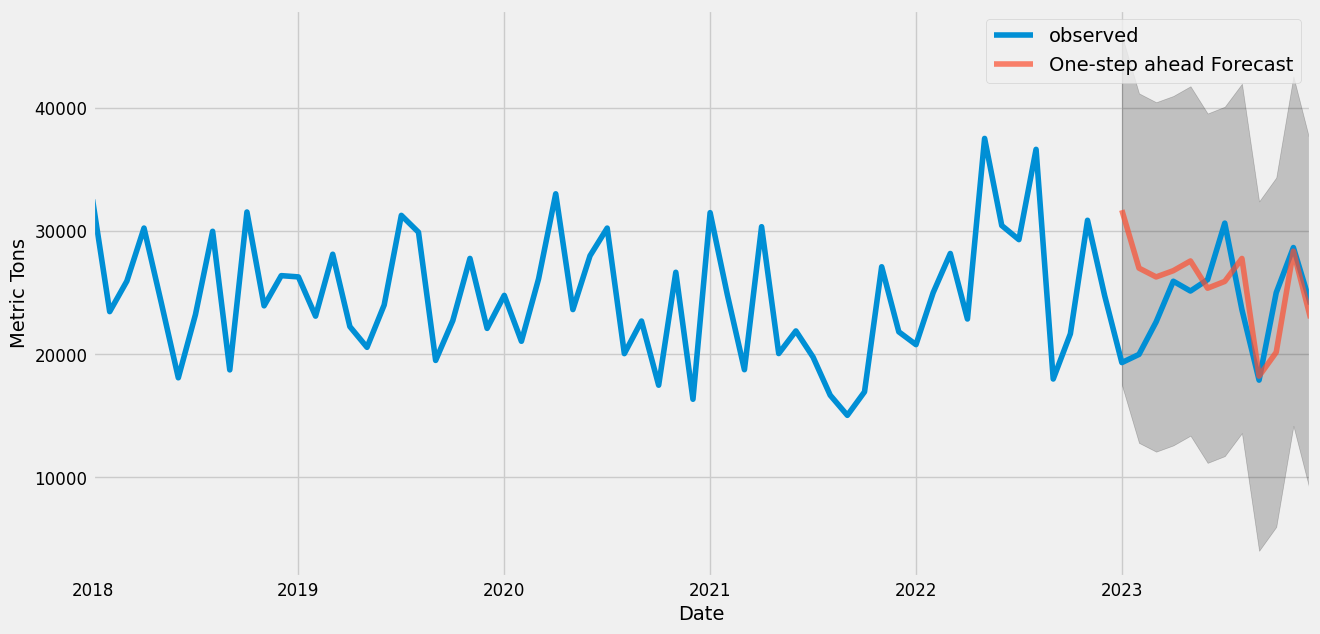

In [41]:
pred = results.get_prediction(start=pd.to_datetime('2023-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = edible['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Metric Tons')
plt.legend()
plt.show()

In [42]:
edible_forecasted = pred.predicted_mean
edible_truth = edible['2023-01-01':]
mse = ((edible_forecasted - edible_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 23942460.5


In [38]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 4893.1


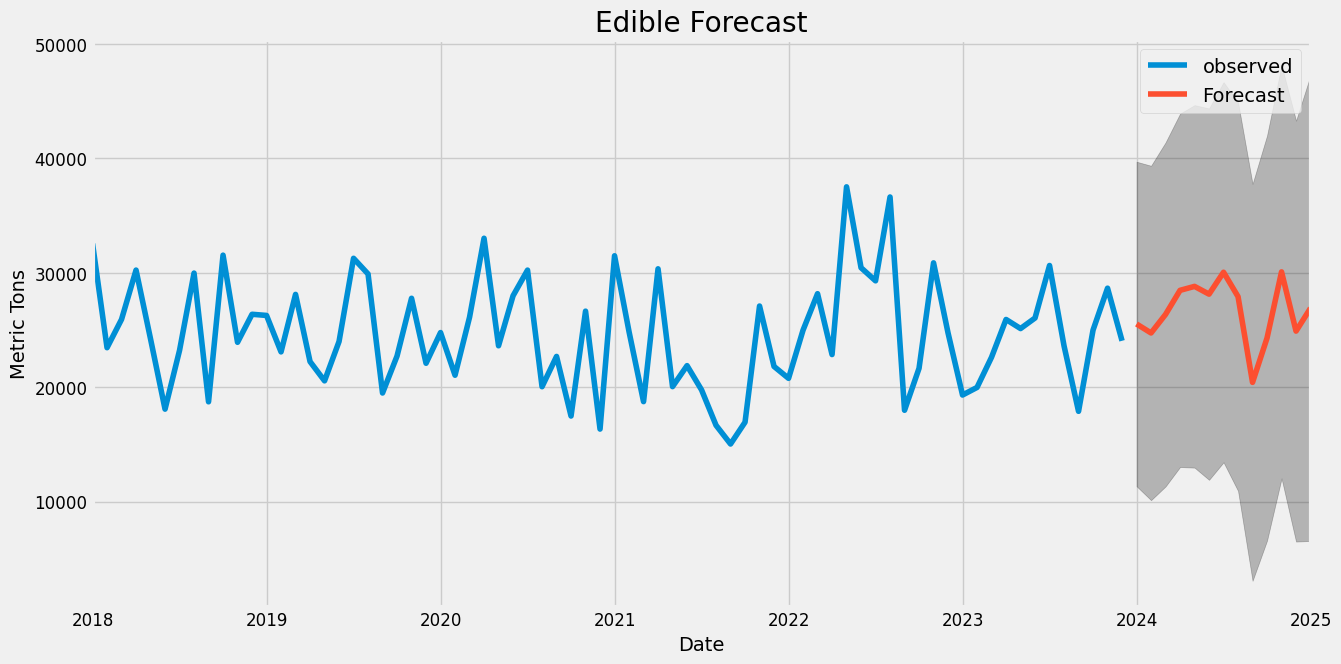

In [36]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = edible.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Metric Tons')
ax.set_title('Edible Forecast')
plt.legend()
plt.show()

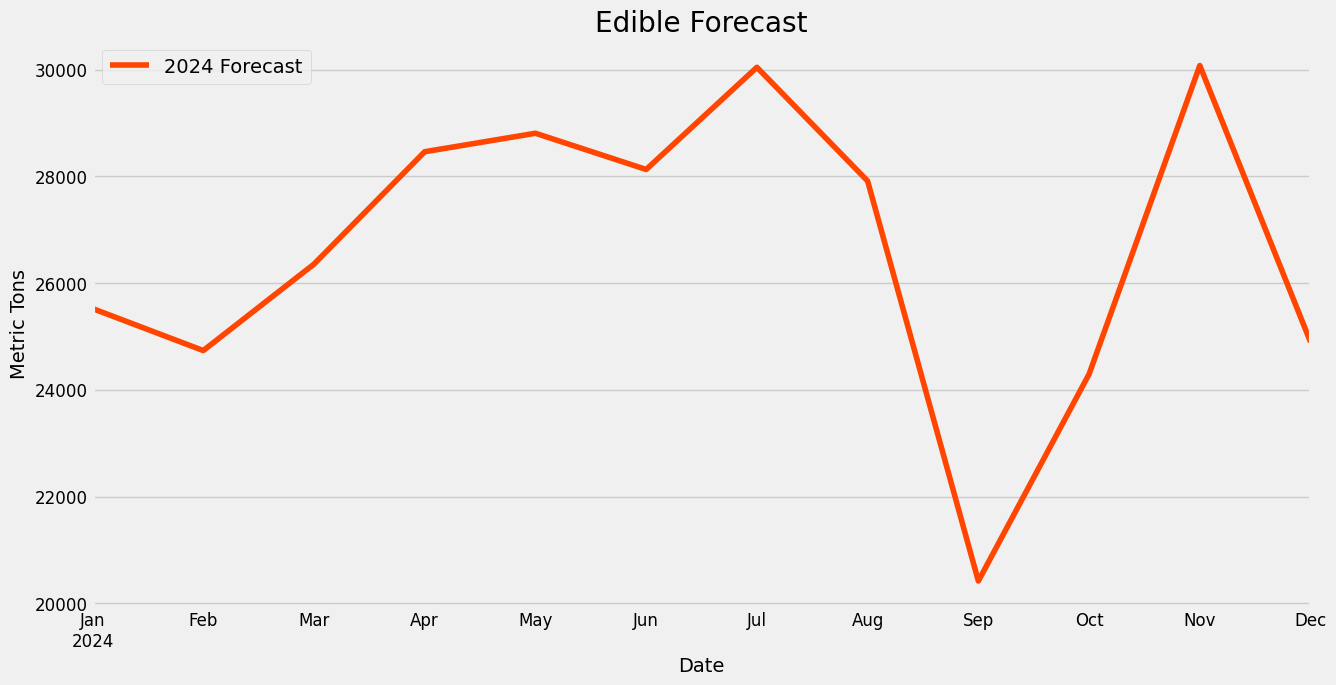

In [56]:
pred_uc = results.get_forecast(steps=12)

# Plotting only the forecasted mean
ax = pred_uc.predicted_mean.plot(label='2024 Forecast', figsize=(14, 7), color='orangered')
#pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.set_xlabel('Date')
ax.set_ylabel('Metric Tons')
ax.set_title('Edible Forecast')
plt.legend()
plt.show()


In [54]:
pred_uc.predicted_mean

2024-01-01    25523.791166
2024-02-01    24736.529513
2024-03-01    26356.906943
2024-04-01    28462.383356
2024-05-01    28808.468812
2024-06-01    28129.572739
2024-07-01    30044.409433
2024-08-01    27913.907897
2024-09-01    20418.555250
2024-10-01    24295.708115
2024-11-01    30076.927083
2024-12-01    24897.280627
Freq: MS, Name: predicted_mean, dtype: float64

In [55]:
Total = 25523.791166 + 24736.529513 + 26356.906943 + 28462.383356 + 28808.468812 + 28129.572739 + 30044.409433 + 27913.907897 + 20418.555250 + 24295.708115 + 30076.927083 + 24897.280627
Total

319664.4409340001

In [57]:
original_value = 288813
new_value = 319664.4409340001

percent_increase = ((new_value - original_value) / original_value) * 100

print("Percent Increase:", percent_increase)

Percent Increase: 10.682151057604772
